In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from warnings import simplefilter
simplefilter(action='ignore')

In [17]:
df = pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [18]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
df.shape

(768, 9)

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Check correlation using HeatMap

(9.0, 0.0)

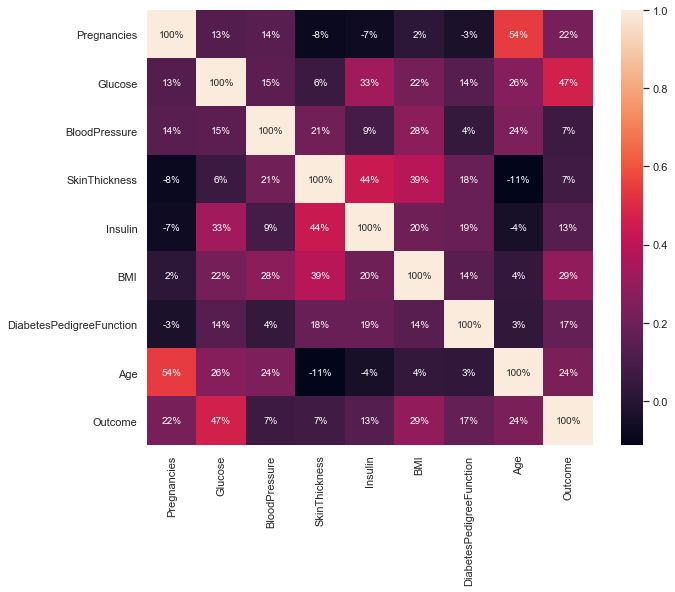

In [52]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), annot=True, fmt=".0%")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


## Split the data into independent 'X' and dependent 'Y' variables

In [60]:
X = df.iloc[:,0:8].values
Y = df.iloc[:,-1:].values

## Split the dataset into 75% Training set and 25% Testing set

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.25)

## Feature scalling

In [63]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

# Classification with Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def models(X_train,Y_tarin):
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train,Y_train)
    parameters = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
    logGS = GridSearchCV(estimator = log, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    logGS.fit(X_train, Y_train)
    
    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8]}]
    knnGS = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    knnGS.fit(X_train, Y_train)
    
    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc = SVC()
    svc.fit(X_train, Y_train)
    parameters = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid']}]
    svcGS = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    svcGS.fit(X_train, Y_train)
    
    #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    parameters = [{'criterion':['entropy', 'gini']}]
    treeGS = GridSearchCV(estimator = tree, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    treeGS.fit(X_train, Y_train)
    
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = DecisionTreeClassifier()
    forest.fit(X_train, Y_train)
    parameters = [{'criterion':['entropy', 'gini']}]
    forestGS = GridSearchCV(estimator = forest, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    forestGS.fit(X_train, Y_train)
    
    model_name = ['Logistic Regression','KNeighbors','SVM', 'GaussianNB', 'Decision Tree', 'Random Forest']
    
    return logGS, knnGS, svcGS, gauss, treeGS, forestGS, model_name

## Building all models

In [65]:
model = models(X_train, Y_train)

## Classification Report OF All Models

In [66]:
for i in range(len(model)-1):
    print('Model : ',model[6][i])
    #Check precision, recall, f1-score
    print(classification_report(Y_test, model[i].predict(X_test)))
    print('------------------')
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print('-----------------------------------------------------')

Model :  Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

------------------
0.8020833333333334
-----------------------------------------------------
Model :  KNeighbors
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       130
           1       0.59      0.52      0.55        62

    accuracy                           0.73       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192

------------------
0.7291666666666666
-----------------------------------------------------
Model :  SVM
              precision    recall  f1-score   support

           0       0.82      0.90      0.86  

<b>The Best Model is Random Forest despite the accuracy score is less, but this model is fair and best among all the models</b>

## Saving Model

In [ ]:
from sklearn.externals import joblib
joblib.dump(model[3], 'diabetes_model.pkl')